In [2]:
#required libraries
import requests
from bs4 import BeautifulSoup

In [3]:
def getpage(no):
    res = requests.get("https://priceoye.pk/mobiles?page="+str(no))
    return res

page=getpage(1)

In [4]:
#see response status
page.status_code

200

In [5]:
# Now we are getting content 
page.content

b'<!doctype html>\n<html dir="ltr" lang="en">\n\n<head>\n    <meta charset="utf-8" />\n    <title>\n        Find the Latest Mobile Prices in Pakistan | PriceOye    </title>\n\n    <link rel="preconnect" href="//cdn.ampproject.org">\n    <link rel="preconnect" href="https://fonts.googleapis.com">\n    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>\n    <link href="https://fonts.googleapis.com/css2?family=Open+Sans:wght@400;600&display=swap" rel="stylesheet">\n    \n    <link rel="dns-prefetch" href="//cdn.ampproject.org">\n    <link rel="preconnect" href="//static.priceoye.pk">\n    <link rel="dns-prefetch" href="//static.priceoye.pk">\n    <link rel="preconnect" href="//images.priceoye.pk">\n    <link rel="dns-prefetch" href="//images.priceoye.pk">\n        <link rel="preload" as="image" href="https://static.priceoye.pk/images/placeholder-product-mobile.jpg">\n    <link rel="preload" as="image" href="https://static.priceoye.pk/images/product-placeholder.jpg">\n   

In [6]:
# create beautifulSoup object
soup = BeautifulSoup(page.content, 'html.parser')

In [7]:
#View formatted content
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Find the Latest Mobile Prices in Pakistan | PriceOye
  </title>
  <link href="//cdn.ampproject.org" rel="preconnect"/>
  <link href="https://fonts.googleapis.com" rel="preconnect"/>
  <link crossorigin="" href="https://fonts.gstatic.com" rel="preconnect"/>
  <link href="https://fonts.googleapis.com/css2?family=Open+Sans:wght@400;600&amp;display=swap" rel="stylesheet"/>
  <link href="//cdn.ampproject.org" rel="dns-prefetch"/>
  <link href="//static.priceoye.pk" rel="preconnect"/>
  <link href="//static.priceoye.pk" rel="dns-prefetch"/>
  <link href="//images.priceoye.pk" rel="preconnect"/>
  <link href="//images.priceoye.pk" rel="dns-prefetch"/>
  <link as="image" href="https://static.priceoye.pk/images/placeholder-product-mobile.jpg" rel="preload"/>
  <link as="image" href="https://static.priceoye.pk/images/product-placeholder.jpg" rel="preload"/>
  <meta content="#ffffff" name="msapplication-Tile

In [8]:
# checking for a single product


soup.find('div', class_='productBox b-productBox')

<div class="productBox b-productBox" data-brand="infinix" data-slug="infinix-hot-12-play">
<a class="" href="https://priceoye.pk/mobiles/infinix/infinix-hot-12-play">
<div class="image-box desktop">
<div id="home-badges">
<div class="hme-badge-logo">
</div>
</div>
<amp-img alt="Infinix Hot 12 Play" class="product-thumbnail" height="120" layout="flex-item" src="https://images.priceoye.pk/infinix-hot-12-play-pakistan-priceoye-1sinx-270x270.webp" width="120"><amp-img alt="Infinix Hot 12 Play" class="product-thumbnail" fallback="" height="120" layout="flex-item" src="https://images.priceoye.pk/infinix-hot-12-play-pakistan-priceoye-1sinx-270x270.jpg" width="120"></amp-img><amp-img alt="Infinix Hot 12 Play" layout="fill" placeholder="" src="https://static.priceoye.pk/images/placeholder-product-mobile.jpg">
<noscript>
<img alt="Infinix Hot 12 Play" src="https://static.priceoye.pk/images/placeholder-product-mobile.jpg"/>
</noscript>
</amp-img></amp-img>
</div>
<div class="detail-box">
<div cla

In [9]:
MobileAdd=soup.find('div', class_='productBox b-productBox')

print(MobileAdd.find(class_='p-title bold h5').get_text().split()[0])
print(MobileAdd.find(class_='p-title bold h5').get_text().strip())
print(MobileAdd.find(class_='price-box').get_text().strip())
print(MobileAdd.find(class_='price-diff-retail').get_text().strip())
print(MobileAdd.find(class_='price-diff-saving').get_text().strip())
print(MobileAdd.a.get('href').strip())
print(MobileAdd.img.get('src').strip())






# print(car.h3.get_text(strip=True))
# print(car.a.get('href'))
# print(car.find('a').get('href'))
# print(car.find('a').get('data-id'))
# print(car.find(class_='result-price').get_text())
# print(car.find(class_='result-hood').get_text(strip=True))
# print(car.find(class_='result-date').get('title'))
# print(car.find(class_='result-date').get('datetime'))
# print(car.find(class_='result-date').get_text())

Infinix
Infinix Hot 12 Play
Rs. 34,199
Rs. 35,999
(5% OFF)
https://priceoye.pk/mobiles/infinix/infinix-hot-12-play
https://static.priceoye.pk/images/placeholder-product-mobile.jpg


In [10]:
# Total number of Ads on a page
len(soup.find_all('div', class_='productBox b-productBox'))

35

In [11]:
l=[]
for details in soup.find_all('div', class_='productBox b-productBox'):
    price_diff_retail=None
    price_diff_saving=None
    if details.find(class_='price-diff-retail') is not None:
          price_diff_retail=details.find(class_='price-diff-retail').get_text()
    if details.find(class_='price-diff-saving') is not None:
          price_diff_saving=details.find(class_='price-diff-saving').get_text()
    o=[
        details.find(class_='p-title bold h5').get_text().split()[0],
        details.find(class_='p-title bold h5').get_text().strip(),
        details.find(class_='price-box').get_text().strip(),
        price_diff_retail,
        price_diff_saving,
        details.a.get('href').strip(),
        details.img.get('src').strip()
       
      ]
    l.append(o)
#     print(l)



display(l)

[['Infinix',
  'Infinix Hot 12 Play',
  'Rs. 34,199',
  '\n                Rs. 35,999            ',
  '\n                (5% OFF)            ',
  'https://priceoye.pk/mobiles/infinix/infinix-hot-12-play',
  'https://static.priceoye.pk/images/placeholder-product-mobile.jpg'],
 ['Infinix',
  'Infinix Hot 12i',
  'Rs. 38,199',
  '\n                Rs. 42,000            ',
  '\n                (9% OFF)            ',
  'https://priceoye.pk/mobiles/infinix/infinix-hot-12i',
  'https://static.priceoye.pk/images/placeholder-product-mobile.jpg'],
 ['Infinix',
  'Infinix Note 12 G96',
  'Rs. 51,699',
  '\n                Rs. 54,999            ',
  '\n                (6% OFF)            ',
  'https://priceoye.pk/mobiles/infinix/infinix-note-12-g96',
  'https://static.priceoye.pk/images/placeholder-product-mobile.jpg'],
 ['ZTE',
  'ZTE Blade A31 Plus',
  'Rs. 18,999',
  '\n                Rs. 22,299            ',
  '\n                (15% OFF)            ',
  'https://priceoye.pk/mobiles/zte/zte-b

In [12]:
# checking for Duplicates

new_list = []

for i in l:
    if i not in new_list:
        new_list.append(i)

display(new_list)
print("Length of list is",len(new_list))

[['Infinix',
  'Infinix Hot 12 Play',
  'Rs. 34,199',
  '\n                Rs. 35,999            ',
  '\n                (5% OFF)            ',
  'https://priceoye.pk/mobiles/infinix/infinix-hot-12-play',
  'https://static.priceoye.pk/images/placeholder-product-mobile.jpg'],
 ['Infinix',
  'Infinix Hot 12i',
  'Rs. 38,199',
  '\n                Rs. 42,000            ',
  '\n                (9% OFF)            ',
  'https://priceoye.pk/mobiles/infinix/infinix-hot-12i',
  'https://static.priceoye.pk/images/placeholder-product-mobile.jpg'],
 ['Infinix',
  'Infinix Note 12 G96',
  'Rs. 51,699',
  '\n                Rs. 54,999            ',
  '\n                (6% OFF)            ',
  'https://priceoye.pk/mobiles/infinix/infinix-note-12-g96',
  'https://static.priceoye.pk/images/placeholder-product-mobile.jpg'],
 ['ZTE',
  'ZTE Blade A31 Plus',
  'Rs. 18,999',
  '\n                Rs. 22,299            ',
  '\n                (15% OFF)            ',
  'https://priceoye.pk/mobiles/zte/zte-b

Length of list is 35


In [13]:
# Now ill be repeating above Code to scrapt other pages.
# will create a function

In [14]:

page = requests.get("https://priceoye.pk/mobiles?page=3")
if(page.status_code == 200):
    print('Page 2 Fetched Successfully')
    
soup = BeautifulSoup(page.content, 'html.parser')

# print(soup.prettify())

print('Viewing first ad of page 2 (For checking purpose) : ')
MobileAdd=soup.find('div', class_='productBox b-productBox')
print(MobileAdd.find(class_='p-title bold h5').get_text().split()[0]),
print(MobileAdd.find(class_='p-title bold h5').get_text().strip())
print(MobileAdd.find(class_='price-box').get_text().strip())
# print(MobileAdd.find(class_='price-diff-retail').get_text().strip())
# print(MobileAdd.find(class_='price-diff-saving').get_text().strip())
print(MobileAdd.a.get('href').strip())
print(MobileAdd.img.get('src').strip())



# Total number of Ads on a page
print("Total number of Ads this page :",len(soup.find_all('div', class_='productBox b-productBox')))


for details in soup.find_all('div', class_='productBox b-productBox'):
    price_diff_retail=None
    price_diff_saving=None
    if details.find(class_='price-diff-retail') is not None:
          price_diff_retail=details.find(class_='price-diff-retail').get_text()
    if details.find(class_='price-diff-saving') is not None:
          price_diff_saving=details.find(class_='price-diff-saving').get_text()
    o=[
        details.find(class_='p-title bold h5').get_text().split()[0],
        details.find(class_='p-title bold h5').get_text().strip(),
        details.find(class_='price-box').get_text().strip(),
        price_diff_retail,
        price_diff_saving,
        details.a.get('href').strip(),
        details.img.get('src').strip()
    ]
    l.append(o)


for i in l:
    if i not in new_list:
        new_list.append(i)

# display(new_list)
print("Length of list is",len(new_list))

display(new_list)


Page 2 Fetched Successfully
Viewing first ad of page 2 (For checking purpose) : 
Tecno
Tecno POP 5 LTE
Rs. 24,299
https://priceoye.pk/mobiles/tecno/tecno-pop-5-lte
https://static.priceoye.pk/images/placeholder-product-mobile.jpg
Total number of Ads this page : 35
Length of list is 70


[['Infinix',
  'Infinix Hot 12 Play',
  'Rs. 34,199',
  '\n                Rs. 35,999            ',
  '\n                (5% OFF)            ',
  'https://priceoye.pk/mobiles/infinix/infinix-hot-12-play',
  'https://static.priceoye.pk/images/placeholder-product-mobile.jpg'],
 ['Infinix',
  'Infinix Hot 12i',
  'Rs. 38,199',
  '\n                Rs. 42,000            ',
  '\n                (9% OFF)            ',
  'https://priceoye.pk/mobiles/infinix/infinix-hot-12i',
  'https://static.priceoye.pk/images/placeholder-product-mobile.jpg'],
 ['Infinix',
  'Infinix Note 12 G96',
  'Rs. 51,699',
  '\n                Rs. 54,999            ',
  '\n                (6% OFF)            ',
  'https://priceoye.pk/mobiles/infinix/infinix-note-12-g96',
  'https://static.priceoye.pk/images/placeholder-product-mobile.jpg'],
 ['ZTE',
  'ZTE Blade A31 Plus',
  'Rs. 18,999',
  '\n                Rs. 22,299            ',
  '\n                (15% OFF)            ',
  'https://priceoye.pk/mobiles/zte/zte-b

In [15]:
page = requests.get("https://priceoye.pk/mobiles?page=4")
if(page.status_code == 200):
    print('Page 4 Fetched Successfully')
    
soup = BeautifulSoup(page.content, 'html.parser')

# print(soup.prettify())

# print('Viewing first ad of page 4 (For checking purpose) : ')
# MobileAdd=soup.find('div', class_='productBox b-productBox')
# print(MobileAdd.find(class_='p-title bold h5').get_text().strip())
# print(MobileAdd.find(class_='price-box').get_text().strip())
# # print(MobileAdd.find(class_='price-diff-retail').get_text().strip())
# # print(MobileAdd.find(class_='price-diff-saving').get_text().strip())
# print(MobileAdd.a.get('href').strip())
# print(MobileAdd.img.get('src').strip())



# Total number of Ads on a page
print("Total number of Ads this page :",len(soup.find_all('div', class_='productBox b-productBox')))


for details in soup.find_all('div', class_='productBox b-productBox'):
    price_diff_retail=None
    price_diff_saving=None
    if details.find(class_='price-diff-retail') is not None:
          price_diff_retail=details.find(class_='price-diff-retail').get_text()
    if details.find(class_='price-diff-saving') is not None:
          price_diff_saving=details.find(class_='price-diff-saving').get_text()
    o=[
        details.find(class_='p-title bold h5').get_text().split()[0],
        details.find(class_='p-title bold h5').get_text().strip(),
        details.find(class_='price-box').get_text().strip(),
        price_diff_retail,
        price_diff_saving,
        details.a.get('href').strip(),
        details.img.get('src').strip()
    ]

    l.append(o)


for i in l:
    if i not in new_list:
        new_list.append(i)

# display(new_list)
print("Length of list is",len(new_list))

# display(new_list)


Page 4 Fetched Successfully
Total number of Ads this page : 35
Length of list is 105


In [16]:
page = requests.get("https://priceoye.pk/mobiles?page=5")
if(page.status_code == 200):
    print('Page 5 Fetched Successfully')
    
soup = BeautifulSoup(page.content, 'html.parser')


# Total number of Ads on a page
print("Total number of Ads this page :",len(soup.find_all('div', class_='productBox b-productBox')))


for details in soup.find_all('div', class_='productBox b-productBox'):
    price_diff_retail=None
    price_diff_saving=None
    if details.find(class_='price-diff-retail') is not None:
          price_diff_retail=details.find(class_='price-diff-retail').get_text()
    if details.find(class_='price-diff-saving') is not None:
          price_diff_saving=details.find(class_='price-diff-saving').get_text()
    o=[
        details.find(class_='p-title bold h5').get_text().split()[0],
        details.find(class_='p-title bold h5').get_text().strip(),
        details.find(class_='price-box').get_text().strip(),
        price_diff_retail,
        price_diff_saving,
        details.a.get('href').strip(),
        details.img.get('src').strip()
    ]

    l.append(o)


for i in l:
    if i not in new_list:
        new_list.append(i)

# display(new_list)
print("Length of list is",len(new_list))

# display(new_list)


Page 5 Fetched Successfully
Total number of Ads this page : 35
Length of list is 139


In [17]:
page = requests.get("https://priceoye.pk/mobiles?page=6")
if(page.status_code == 200):
    print('Page 6 Fetched Successfully')
    
soup = BeautifulSoup(page.content, 'html.parser')

# print(soup.prettify())

# print('Viewing first ad of page 6 (For checking purpose) : ')
# MobileAdd=soup.find('div', class_='productBox b-productBox')
# print(MobileAdd.find(class_='p-title bold h5').get_text().strip())
# print(MobileAdd.find(class_='price-box').get_text().strip())
# # print(MobileAdd.find(class_='price-diff-retail').get_text().strip())
# # print(MobileAdd.find(class_='price-diff-saving').get_text().strip())
# print(MobileAdd.a.get('href').strip())
# print(MobileAdd.img.get('src').strip())



# Total number of Ads on a page
print("Total number of Ads this page :",len(soup.find_all('div', class_='productBox b-productBox')))


for details in soup.find_all('div', class_='productBox b-productBox'):
    price_diff_retail=None
    price_diff_saving=None
    if details.find(class_='price-diff-retail') is not None:
          price_diff_retail=details.find(class_='price-diff-retail').get_text()
    if details.find(class_='price-diff-saving') is not None:
          price_diff_saving=details.find(class_='price-diff-saving').get_text()
    o=[
        details.find(class_='p-title bold h5').get_text().split()[0],
        details.find(class_='p-title bold h5').get_text().strip(),
        details.find(class_='price-box').get_text().strip(),
        price_diff_retail,
        price_diff_saving,
        details.a.get('href').strip(),
        details.img.get('src').strip()
    ]

    l.append(o)


for i in l:
    if i not in new_list:
        new_list.append(i)

# display(new_list)
print("Length of list is",len(new_list))

# display(new_list)


Page 6 Fetched Successfully
Total number of Ads this page : 35
Length of list is 174


In [18]:
page = requests.get("https://priceoye.pk/mobiles?page=7")
if(page.status_code == 200):
    print('Page 7 Fetched Successfully')
    
soup = BeautifulSoup(page.content, 'html.parser')

# print(soup.prettify())

# print('Viewing first ad of page 7 (For checking purpose) : ')
# MobileAdd=soup.find('div', class_='productBox b-productBox')
# print(MobileAdd.find(class_='p-title bold h5').get_text().strip())
# print(MobileAdd.find(class_='price-box').get_text().strip())
# # print(MobileAdd.find(class_='price-diff-retail').get_text().strip())
# # print(MobileAdd.find(class_='price-diff-saving').get_text().strip())
# print(MobileAdd.a.get('href').strip())
# print(MobileAdd.img.get('src').strip())



# Total number of Ads on a page
print("Total number of Ads this page :",len(soup.find_all('div', class_='productBox b-productBox')))


for details in soup.find_all('div', class_='productBox b-productBox'):
    price_diff_retail=None
    price_diff_saving=None
    if details.find(class_='price-diff-retail') is not None:
          price_diff_retail=details.find(class_='price-diff-retail').get_text()
    if details.find(class_='price-diff-saving') is not None:
          price_diff_saving=details.find(class_='price-diff-saving').get_text()
    o=[
        details.find(class_='p-title bold h5').get_text().split()[0],
        details.find(class_='p-title bold h5').get_text().strip(),
        details.find(class_='price-box').get_text().strip(),
        price_diff_retail,
        price_diff_saving,
        details.a.get('href').strip(),
        details.img.get('src').strip()
    ]

    l.append(o)


for i in l:
    if i not in new_list:
        new_list.append(i)

# display(new_list)
print("Length of list is",len(new_list))

# display(new_list)


Page 7 Fetched Successfully
Total number of Ads this page : 35
Length of list is 207


In [19]:
page = requests.get("https://priceoye.pk/mobiles?page=8")
if(page.status_code == 200):
    print('Page 8 Fetched Successfully')
    
soup = BeautifulSoup(page.content, 'html.parser')

# print(soup.prettify())

# print('Viewing first ad of page 8 (For checking purpose) : ')
# MobileAdd=soup.find('div', class_='productBox b-productBox')
# print(MobileAdd.find(class_='p-title bold h5').get_text().strip())
# print(MobileAdd.find(class_='price-box').get_text().strip())
# # print(MobileAdd.find(class_='price-diff-retail').get_text().strip())
# # print(MobileAdd.find(class_='price-diff-saving').get_text().strip())
# print(MobileAdd.a.get('href').strip())
# print(MobileAdd.img.get('src').strip())



# Total number of Ads on a page
print("Total number of Ads this page :",len(soup.find_all('div', class_='productBox b-productBox')))


for details in soup.find_all('div', class_='productBox b-productBox'):
    price_diff_retail=None
    price_diff_saving=None
    if details.find(class_='price-diff-retail') is not None:
          price_diff_retail=details.find(class_='price-diff-retail').get_text()
    if details.find(class_='price-diff-saving') is not None:
          price_diff_saving=details.find(class_='price-diff-saving').get_text()
    o=[
        details.find(class_='p-title bold h5').get_text().split()[0],
        details.find(class_='p-title bold h5').get_text().strip(),
        details.find(class_='price-box').get_text().strip(),
        price_diff_retail,
        price_diff_saving,
        details.a.get('href').strip(),
        details.img.get('src').strip()
    ]
    l.append(o)


for i in l:
    if i not in new_list:
        new_list.append(i)

# display(new_list)
print("Length of list is",len(new_list))

# display(new_list)


Page 8 Fetched Successfully
Total number of Ads this page : 35
Length of list is 242


In [20]:
page = requests.get("https://priceoye.pk/mobiles?page=9")
if(page.status_code == 200):
    print('Page 9 Fetched Successfully')
    
soup = BeautifulSoup(page.content, 'html.parser')

# print(soup.prettify())

# print('Viewing first ad of page 9 (For checking purpose) : ')
# MobileAdd=soup.find('div', class_='productBox b-productBox')
# print(MobileAdd.find(class_='p-title bold h5').get_text().strip())
# print(MobileAdd.find(class_='price-box').get_text().strip())
# # print(MobileAdd.find(class_='price-diff-retail').get_text().strip())
# # print(MobileAdd.find(class_='price-diff-saving').get_text().strip())
# print(MobileAdd.a.get('href').strip())
# print(MobileAdd.img.get('src').strip())



# Total number of Ads on a page
print("Total number of Ads this page :",len(soup.find_all('div', class_='productBox b-productBox')))


for details in soup.find_all('div', class_='productBox b-productBox'):
    price_diff_retail=None
    price_diff_saving=None
    if details.find(class_='price-diff-retail') is not None:
          price_diff_retail=details.find(class_='price-diff-retail').get_text()
    if details.find(class_='price-diff-saving') is not None:
          price_diff_saving=details.find(class_='price-diff-saving').get_text()
    o=[
        details.find(class_='p-title bold h5').get_text().split()[0],
        details.find(class_='p-title bold h5').get_text().strip(),
        details.find(class_='price-box').get_text().strip(),
        price_diff_retail,
        price_diff_saving,
        details.a.get('href').strip(),
        details.img.get('src').strip()
    ]

    l.append(o)


for i in l:
    if i not in new_list:
        new_list.append(i)

# display(new_list)
print("Length of list is",len(new_list))

# display(new_list)


Page 9 Fetched Successfully
Total number of Ads this page : 35
Length of list is 277


In [21]:
page = requests.get("https://priceoye.pk/mobiles?page=10")
if(page.status_code == 200):
    print('Page 10 Fetched Successfully')
    
soup = BeautifulSoup(page.content, 'html.parser')

# print(soup.prettify())

# print('Viewing first ad of page 10 (For checking purpose) : ')
# MobileAdd=soup.find('div', class_='productBox b-productBox')
# print(MobileAdd.find(class_='p-title bold h5').get_text().strip())
# print(MobileAdd.find(class_='price-box').get_text().strip())
# # print(MobileAdd.find(class_='price-diff-retail').get_text().strip())
# # print(MobileAdd.find(class_='price-diff-saving').get_text().strip())
# print(MobileAdd.a.get('href').strip())
# print(MobileAdd.img.get('src').strip())



# Total number of Ads on a page
print("Total number of Ads this page :",len(soup.find_all('div', class_='productBox b-productBox')))


for details in soup.find_all('div', class_='productBox b-productBox'):
    price_diff_retail=None
    price_diff_saving=None
    if details.find(class_='price-diff-retail') is not None:
          price_diff_retail=details.find(class_='price-diff-retail').get_text()
    if details.find(class_='price-diff-saving') is not None:
          price_diff_saving=details.find(class_='price-diff-saving').get_text()
    o=[
        details.find(class_='p-title bold h5').get_text().split()[0],
        details.find(class_='p-title bold h5').get_text().strip(),
        details.find(class_='price-box').get_text().strip(),
        price_diff_retail,
        price_diff_saving,
        details.a.get('href').strip(),
        details.img.get('src').strip()
    ]

    l.append(o)


for i in l:
    if i not in new_list:
        new_list.append(i)

# display(new_list)
print("Length of list is",len(new_list))

# display(new_list)


Page 10 Fetched Successfully
Total number of Ads this page : 10
Length of list is 287


In [22]:
if(requests.get("https://priceoye.pk/mobiles?page=11") == '<Response [200]>'):
    page = requests.get("https://priceoye.pk/mobiles?page=11")
    if(page.status_code == 200):
        print('Page 10 Fetched Successfully')
    soup = BeautifulSoup(page.content, 'html.parser')

# print(soup.prettify())

# print('Viewing first ad of page 10 (For checking purpose) : ')
# MobileAdd=soup.find('div', class_='productBox b-productBox')
# print(MobileAdd.find(class_='p-title bold h5').get_text().strip())
# print(MobileAdd.find(class_='price-box').get_text().strip())
# # print(MobileAdd.find(class_='price-diff-retail').get_text().strip())
# # print(MobileAdd.find(class_='price-diff-saving').get_text().strip())
# print(MobileAdd.a.get('href').strip())
# print(MobileAdd.img.get('src').strip())



# Total number of Ads on a page
if(len(soup.find_all('div', class_='productBox b-productBox')) == 0):
   print("Noo More Data Found")
else:
    print("Total number of Ads this page :",len(soup.find_all('div', class_='productBox b-productBox')))
    for details in soup.find_all('div', class_='productBox b-productBox'):
        price_diff_retail=None
        price_diff_saving=None
        if details.find(class_='price-diff-retail') is not None:
            price_diff_retail=details.find(class_='price-diff-retail').get_text()
        if details.find(class_='price-diff-saving') is not None:
            price_diff_saving=details.find(class_='price-diff-saving').get_text()
        o=[
            details.find(class_='p-title bold h5').get_text().split()[0],
            details.find(class_='p-title bold h5').get_text().strip(),
            details.find(class_='price-box').get_text().strip(),
            price_diff_retail,
            price_diff_saving,
            details.a.get('href').strip(),
            details.img.get('src').strip()
        ]
        l.append(o)
    
    for i in l:
        if i not in new_list:
            new_list.append(i)



# display(new_list)
print("Length of list is",len(new_list))

# display(new_list)


Total number of Ads this page : 10
Length of list is 287


In [23]:
# Now we have done Scrapping, we are focusing on Data Cleaning and Visualization

# List to dataFrame






In [48]:
# setting Colomn Names

import pandas as pd    

df = pd.DataFrame(new_list,columns= ['Brand', 'Phone_Name', 'Price', 'MarketPrice','Discount','Link', 'ImageLink'])

display(df)
#df = pd.read_csv('PriceOyeData.csv')

df.to_csv("PriceOyeData.csv",index=False)
df = pd.read_csv('PriceOyeData.csv')
display(df)

,Brand,Phone_Name,Price,MarketPrice,Discount,Link,ImageLink
0,Infinix,Infinix Hot 12 Play,"Rs. 34,199","\n Rs. 35,999",\n (5% OFF),https://priceoye.pk/mobiles/infinix/infinix-ho...,https://static.priceoye.pk/images/placeholder-...
1,Infinix,Infinix Hot 12i,"Rs. 38,199","\n Rs. 42,000",\n (9% OFF),https://priceoye.pk/mobiles/infinix/infinix-ho...,https://static.priceoye.pk/images/placeholder-...
2,Infinix,Infinix Note 12 G96,"Rs. 51,699","\n Rs. 54,999",\n (6% OFF),https://priceoye.pk/mobiles/infinix/infinix-no...,https://static.priceoye.pk/images/placeholder-...
3,ZTE,ZTE Blade A31 Plus,"Rs. 18,999","\n Rs. 22,299",\n (15% OFF),https://priceoye.pk/mobiles/zte/zte-blade-a31-...,https://static.priceoye.pk/images/placeholder-...
4,ZTE,ZTE Blade A52,"Rs. 26,699","\n Rs. 36,199",\n (26% OFF),https://priceoye.pk/mobiles/zte/zte-blade-a52,https://static.priceoye.pk/images/placeholder-...
...,...,...,...,...,...,...,...
282,REMAX,REMAX Thunder Pro,"Rs. 2,710",None,None,https://priceoye.pk/mobiles/remaxx/remax-thund...,https://static.priceoye.pk/images/placeholder-...
283,Faywa,Faywa Magic 2,"Rs. 2,175",None,None,https://priceoye.pk/mobiles/faywa/faywa-magic-2,https://static.priceoye.pk/images/placeholder-...
284,Calme,Calme Classic,"Rs. 2,600",None,None,https://priceoye.pk/mobiles/calme/calme-classic,https://static.priceoye.pk/images/placeholder-...
285,Huawei,Huawei Nova 5z,"Rs. 38,999",None,None,https://priceoye.pk/mobiles/huawei/huawei-nova-5z,https://static.priceoye.pk/images/placeholder-...


,Brand,Phone_Name,Price,MarketPrice,Discount,Link,ImageLink
0,Infinix,Infinix Hot 12 Play,"Rs. 34,199","\n Rs. 35,999",\n (5% OFF),https://priceoye.pk/mobiles/infinix/infinix-ho...,https://static.priceoye.pk/images/placeholder-...
1,Infinix,Infinix Hot 12i,"Rs. 38,199","\n Rs. 42,000",\n (9% OFF),https://priceoye.pk/mobiles/infinix/infinix-ho...,https://static.priceoye.pk/images/placeholder-...
2,Infinix,Infinix Note 12 G96,"Rs. 51,699","\n Rs. 54,999",\n (6% OFF),https://priceoye.pk/mobiles/infinix/infinix-no...,https://static.priceoye.pk/images/placeholder-...
3,ZTE,ZTE Blade A31 Plus,"Rs. 18,999","\n Rs. 22,299",\n (15% OFF),https://priceoye.pk/mobiles/zte/zte-blade-a31-...,https://static.priceoye.pk/images/placeholder-...
4,ZTE,ZTE Blade A52,"Rs. 26,699","\n Rs. 36,199",\n (26% OFF),https://priceoye.pk/mobiles/zte/zte-blade-a52,https://static.priceoye.pk/images/placeholder-...
...,...,...,...,...,...,...,...
282,REMAX,REMAX Thunder Pro,"Rs. 2,710",NaN,NaN,https://priceoye.pk/mobiles/remaxx/remax-thund...,https://static.priceoye.pk/images/placeholder-...
283,Faywa,Faywa Magic 2,"Rs. 2,175",NaN,NaN,https://priceoye.pk/mobiles/faywa/faywa-magic-2,https://static.priceoye.pk/images/placeholder-...
284,Calme,Calme Classic,"Rs. 2,600",NaN,NaN,https://priceoye.pk/mobiles/calme/calme-classic,https://static.priceoye.pk/images/placeholder-...
285,Huawei,Huawei Nova 5z,"Rs. 38,999",NaN,NaN,https://priceoye.pk/mobiles/huawei/huawei-nova-5z,https://static.priceoye.pk/images/placeholder-...


In [49]:
# filter data 


def stringFilteration(x):
 x=str(x)

 return (x.replace('Rs.', '').replace(',', '').replace("\n","").replace(" ","").replace("(","").replace(")","").replace("%",""))

df_copy = df.copy(deep=True)
df_copy['Price'] = df_copy['Price'].apply(lambda x:float(stringFilteration(x)))
df_copy['MarketPrice'] = df_copy['MarketPrice'].apply(lambda x:float(stringFilteration(x)))
df_copy['Discount'] = df_copy['Discount'].apply(lambda x:float(stringFilteration(x).replace("OFF","")))


display(df_copy)


,Brand,Phone_Name,Price,MarketPrice,Discount,Link,ImageLink
0,Infinix,Infinix Hot 12 Play,34199.0,35999.0,5.0,https://priceoye.pk/mobiles/infinix/infinix-ho...,https://static.priceoye.pk/images/placeholder-...
1,Infinix,Infinix Hot 12i,38199.0,42000.0,9.0,https://priceoye.pk/mobiles/infinix/infinix-ho...,https://static.priceoye.pk/images/placeholder-...
2,Infinix,Infinix Note 12 G96,51699.0,54999.0,6.0,https://priceoye.pk/mobiles/infinix/infinix-no...,https://static.priceoye.pk/images/placeholder-...
3,ZTE,ZTE Blade A31 Plus,18999.0,22299.0,15.0,https://priceoye.pk/mobiles/zte/zte-blade-a31-...,https://static.priceoye.pk/images/placeholder-...
4,ZTE,ZTE Blade A52,26699.0,36199.0,26.0,https://priceoye.pk/mobiles/zte/zte-blade-a52,https://static.priceoye.pk/images/placeholder-...
...,...,...,...,...,...,...,...
282,REMAX,REMAX Thunder Pro,2710.0,NaN,NaN,https://priceoye.pk/mobiles/remaxx/remax-thund...,https://static.priceoye.pk/images/placeholder-...
283,Faywa,Faywa Magic 2,2175.0,NaN,NaN,https://priceoye.pk/mobiles/faywa/faywa-magic-2,https://static.priceoye.pk/images/placeholder-...
284,Calme,Calme Classic,2600.0,NaN,NaN,https://priceoye.pk/mobiles/calme/calme-classic,https://static.priceoye.pk/images/placeholder-...
285,Huawei,Huawei Nova 5z,38999.0,NaN,NaN,https://priceoye.pk/mobiles/huawei/huawei-nova-5z,https://static.priceoye.pk/images/placeholder-...


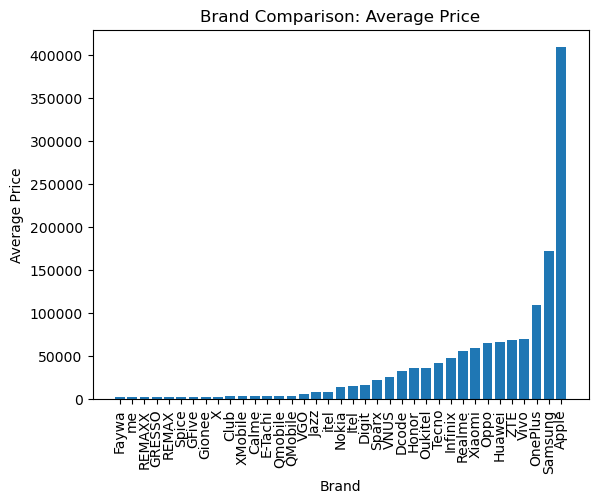

In [41]:
import matplotlib.pyplot as plt

avg_price_by_brand = df_copy.groupby('Brand')['Price'].mean().sort_values()

# Create a bar plot
plt.bar(avg_price_by_brand.index, avg_price_by_brand.values)
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Brand Comparison: Average Price')
plt.xticks(rotation=90)

# Display the plot
plt.show()

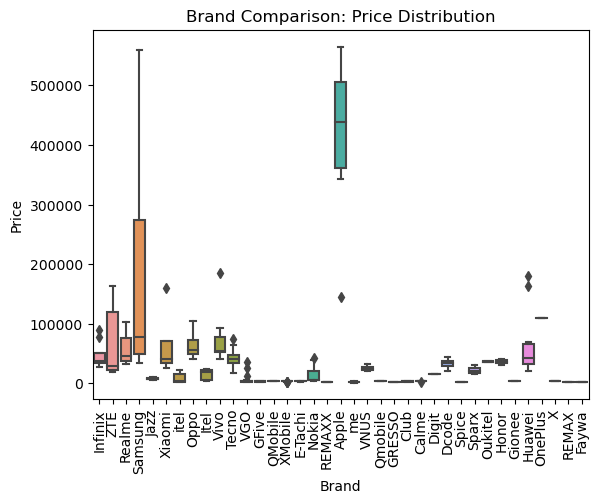

In [43]:
import seaborn as sns

sns.boxplot(data=df_copy, x='Brand', y='Price')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Brand Comparison: Price Distribution')
plt.xticks(rotation=90)
plt.show()

C:\Users\Usman\AppData\Local\Temp\ipykernel_17792\982877251.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_copy, x='Brand', y='Price', ci='sd')


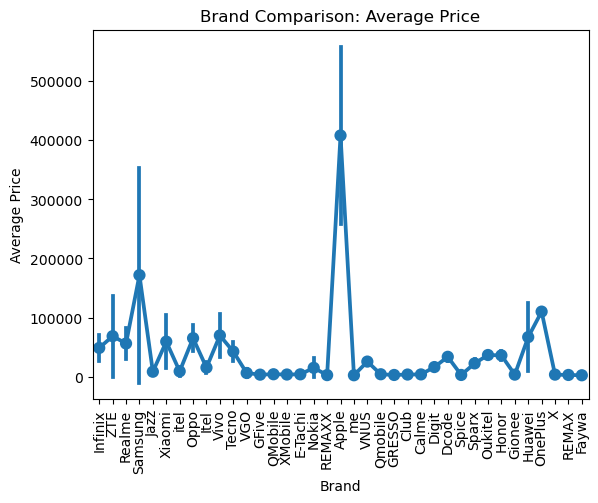

In [50]:

sns.pointplot(data=df_copy, x='Brand', y='Price', ci='sd')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Brand Comparison: Average Price')
plt.xticks(rotation=90)
plt.show()

c:\Users\Usman\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Usman\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Usman\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Usman\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Usman\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Usman\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Usman\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of e

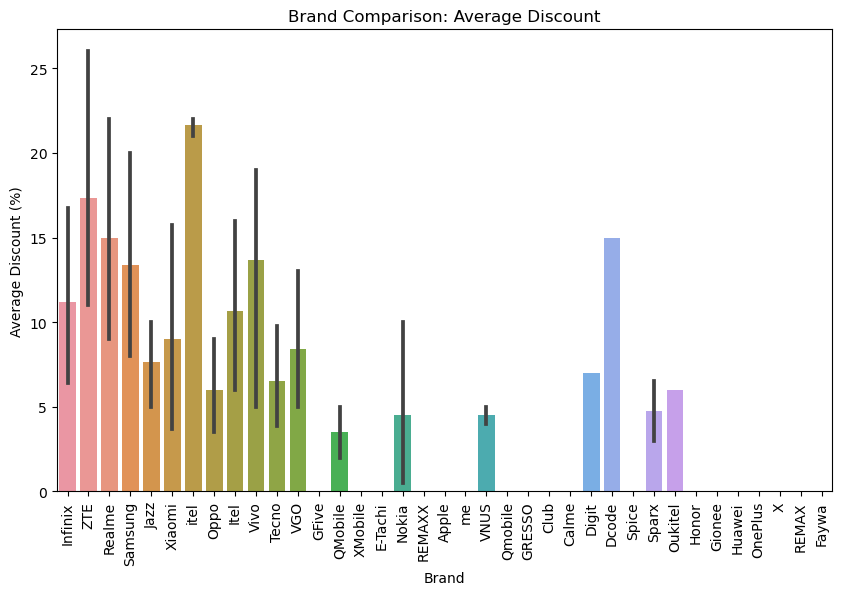

In [51]:
##Bar Plot: A simple bar plot can be used to compare the average discounts for different brands.
plt.figure(figsize=(10, 6))
sns.barplot(data=df_copy, x='Brand', y='Discount')
plt.xlabel('Brand')
plt.ylabel('Average Discount (%)')
plt.title('Brand Comparison: Average Discount')
plt.xticks(rotation=90)
plt.show()

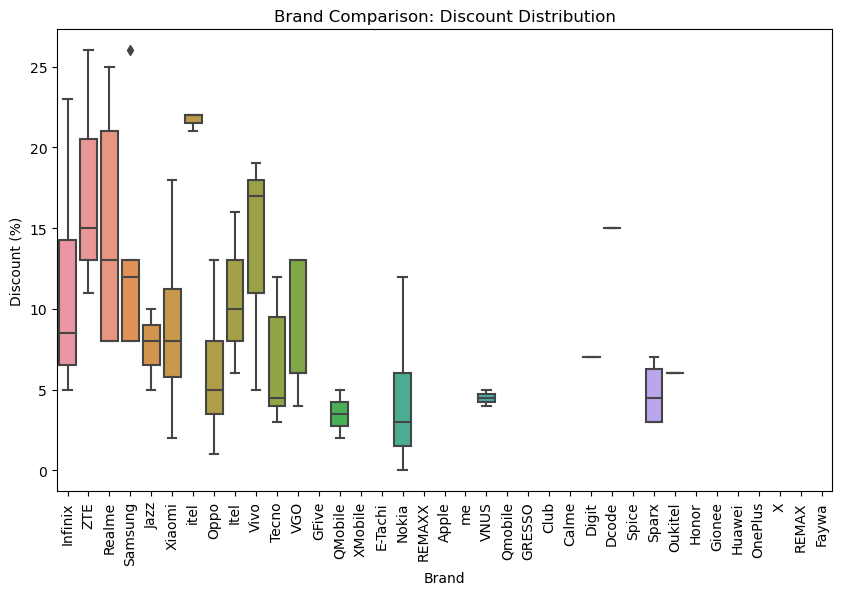

In [53]:
#A box plot can show the distribution of discounts for each brand, allowing you to compare the range and variability of discounts.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='Brand', y='Discount')
plt.xlabel('Brand')
plt.ylabel('Discount (%)')
plt.title('Brand Comparison: Discount Distribution')
plt.xticks(rotation=90)
plt.show()

C:\Users\Usman\AppData\Local\Temp\ipykernel_17792\21313804.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_copy, x='Brand', y='Discount', ci='sd')


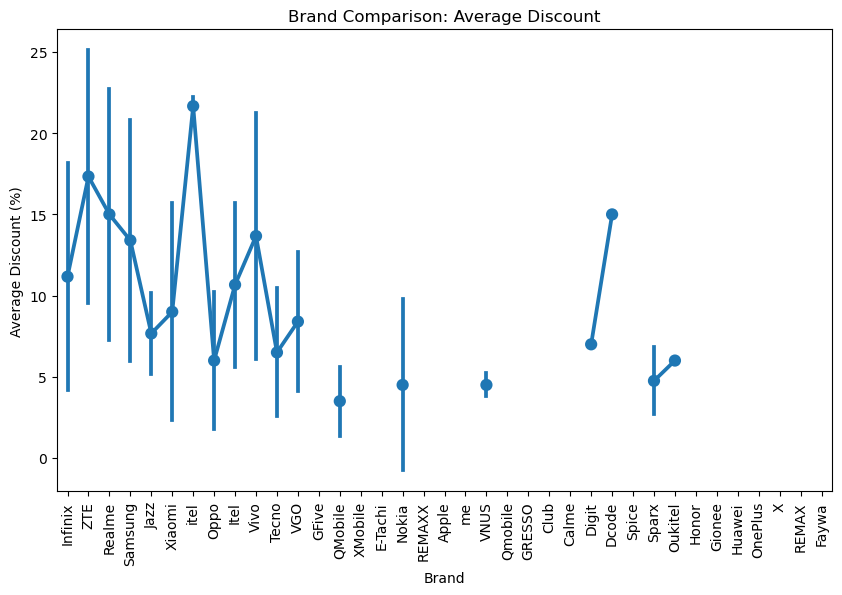

In [57]:
#Point Plot: A point plot can be used to show the average discount for each brand, along with confidence intervals to represent the variability.

plt.figure(figsize=(10, 6))
sns.pointplot(data=df_copy, x='Brand', y='Discount', ci='sd')
plt.xlabel('Brand')
plt.ylabel('Average Discount (%)')
plt.title('Brand Comparison: Average Discount')
plt.xticks(rotation=90)
plt.show()

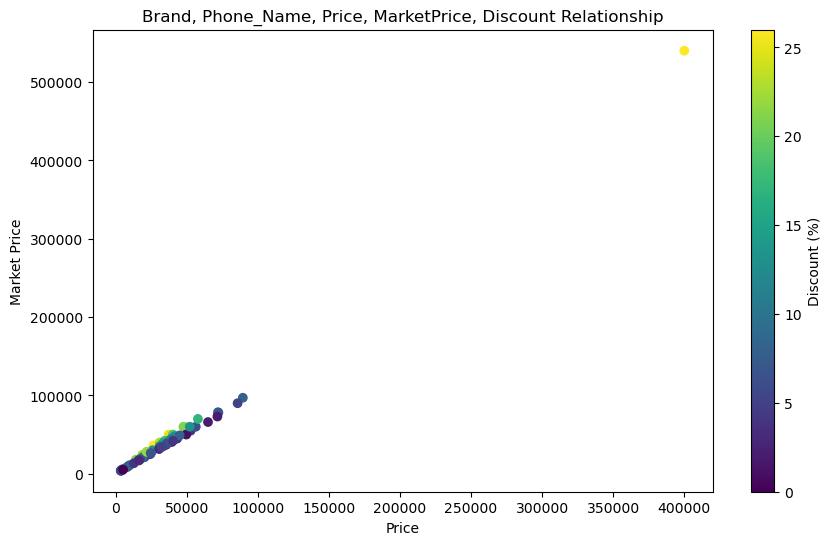

In [59]:
 #show the relationship between Brand, Phone_Name, Price, MarketPrice, and Discount, you can create a scatter plot with different data points representing each combination of these variables. Here's an example using matplotlib:
plt.figure(figsize=(10, 6))
plt.scatter(df_copy['Price'], df_copy['MarketPrice'], c=df_copy['Discount'], cmap='viridis')
plt.colorbar(label='Discount (%)')
plt.xlabel('Price')
plt.ylabel('Market Price')
plt.title('Brand, Phone_Name, Price, MarketPrice, Discount Relationship')
plt.show()